# AIRBNB

Basado en el data set "" del AIRBNB - Buenos Aires, http://insideairbnb.com/about.html

**Problema**

-

**Sobre este notebook**

La idea en este notbook, es solamente mostrar la parte del analisis, lo más completo posible, basado en los conocimientos adquiridos hasta el momento, siempre pensando en que esto sirva luego para poder predecir con Machine Learning y resolver el problema planteado.

**Estructura**

El analisis se estructura de la siguiente forma:
* Importación de librerias.
* Leyendo el data set.
* Análisis exploratorio de datos (EDA).
 * 1. Analizando los tipos de variables (features).
 * 2. Analizando y limpiando el data set.
 * 3. Cantidades totales y estadisticas.
 * 4. Graficando y cruzando variables para entender mejor.
 * 5. Correlaciones.
* Feature Engineering.
 * 1. Discretización y Binning de las edades.
 * 2. Creando el tamaño de las familias.
 * 3. Creando los "titulos" de cada persona
 * 4. Nuevas correlaciones

## Importación de librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (12,5)

## Carga del data set

In [2]:
# Cargamos el data set
df = pd.read_csv('dataset/airbnb_bsas_2020.csv')

In [3]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,7270,¡¡Great Loft in Palermo Hollywood!!,18822,Toni,NaN,Palermo,-34.582410,-58.433820,Entire home/apt,2041,20,14,2018-04-30,0.15,1,363
1,11508,Amazing Luxurious Apt-Palermo Soho,42762,Candela,NaN,Palermo,-34.582250,-58.424600,Entire home/apt,3601,2,26,2019-11-28,0.28,1,323
2,12463,Room in Recoleta - awesome location,48799,Matt,NaN,Recoleta,-34.597610,-58.394680,Private room,1441,1,20,2017-12-11,0.17,1,365
3,13095,Standard Room at Palermo Viejo B&B,50994,Ariel,NaN,Palermo,-34.593820,-58.429940,Private room,2701,1,1,2018-12-18,0.07,7,365
4,13096,Standard Room in Palermo Viejo B&B,50994,Ariel,NaN,Palermo,-34.593980,-58.428530,Private room,2701,1,0,NaN,NaN,7,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24078,41788699,Nazca 1400,330175600,Matafuegos,NaN,Villa Santa Rita,-34.616580,-58.476230,Entire home/apt,1441,2,0,NaN,NaN,1,360
24079,41789537,Modern apartment with pool in the heart of Pal...,128733042,Luisina,NaN,Recoleta,-34.595556,-58.412277,Entire home/apt,3001,4,0,NaN,NaN,2,48
24080,41789708,Greenzone - Habitación privada (hasta 3 personas),22286043,Martina,NaN,Caballito,-34.607010,-58.460170,Private room,600,4,0,NaN,NaN,1,148
24081,41789986,Full 2 guests flat at famous P SOHO PLAZA SERR...,1482817,Lorena,NaN,Palermo,-34.587789,-58.430529,Entire home/apt,1921,3,0,NaN,NaN,45,83


In [4]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

## Análisis exploratorio de datos (EDA)

### 1. Analizando los tipos de variables (features)

### Tipos de variables
Categoricas
* name
* host_name
* neighbourhood
* room_type
* last_review

Númericas discretas
* host_id
* price
* minimum_nights
* number_of_reviews
* calculated_host_listings_count
* availability_365

Númericas continuas
* latitude
* longitude
* reviews_per_month

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24083 entries, 0 to 24082
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              24083 non-null  int64  
 1   name                            24072 non-null  object 
 2   host_id                         24083 non-null  int64  
 3   host_name                       24081 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   24083 non-null  object 
 6   latitude                        24083 non-null  float64
 7   longitude                       24083 non-null  float64
 8   room_type                       24083 non-null  object 
 9   price                           24083 non-null  int64  
 10  minimum_nights                  24083 non-null  int64  
 11  number_of_reviews               24083 non-null  int64  
 12  last_review                     

### 2. Analizando y limpiando el data set.

Veamos la cantidad de valores nulos por columna que tiene el data set.

In [6]:
df.isna().sum()

id                                    0
name                                 11
host_id                               0
host_name                             2
neighbourhood_group               24083
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        6782
reviews_per_month                  6782
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Tenemos cinco columnas que tienen valores vacíos.

Hay que recordar que en total se tienen 24083 instancias,por lo que se procedera a eliminar la columna neighbourhood_group ya que la totalidad de sus valores son nulos. Por otro lado el resto de las columnas no tiene una calidad de valores nulos significante, salvo en last_reviews y reviews_per_month.

Analizemos cada una de las columnas que contienen datos nulos:
* name: Esta feature demuestra una especie de comentario sobre el host, por lo que para este análisis no nos aporta demasiado, se decide dejarla sin imputar los valores faltantes.

* host_name: Este es el nombre del host que brinda el hospedaje, podríamos sacar su valor comparando el host_id, latitud y longitud, para ver si estos valores faltantes coinciden con algun otra instancia y así saber el nombre del host faltante.

* last_review y reviews_per_month: Tienen una cantidad significativa de valores faltantes pero no se imputaran los valores faltantes.

#### Eliminamos la columna neighbourhood_group:

In [7]:
df.drop(columns=['id', 'neighbourhood_group'], inplace=True)

#### Imputamos los valores faltantes de host_name

Primero buscamos las instancias que tienen host_name vacíos y luego con el host_id, buscaremos si existe y así reemplazar el host_name.

In [8]:
df[df['host_name'].isna()]

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
7628,Super Cozy apartment in Belgrano,26484907,NaN,Belgrano,-34.56736,-58.45683,Entire home/apt,900,1,0,NaN,NaN,1,0
8397,Magnífico departamento a metros de Alto Palermo,170460402,NaN,Palermo,-34.58929,-58.41311,Entire home/apt,4802,3,46,2020-01-04,2.04,1,281


In [9]:
df[df['host_id'] == 26484907]
df[df['host_id'] == 170460402]

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
8397,Magnífico departamento a metros de Alto Palermo,170460402,NaN,Palermo,-34.58929,-58.41311,Entire home/apt,4802,3,46,2020-01-04,2.04,1,281


Ninguno de los dos host, tiene más registros en el data set, por lo que no podemos saber el nombre del host, al ser solo dos valores, los dejaremos así ya que no afectará ningún valor estadistico.

#### Analizamos si existen precios = 0:

In [10]:
df[df["price"]==0]

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
10321,Habitación persona sola o pareja,157117755,Geraldin,Velez Sarsfield,-34.6344,-58.48316,Private room,0,30,0,NaN,NaN,1,364


Existe una instancia con precio igual a 0, por lo que este valor, hace que existe una dispersión muy grande. Procederemos a imputarlo por el precio promedio acorde a una Private room en el barrio de Velez Sarfield

In [11]:
# Precio promedio de una private room en el barrio Velez Sarfield
df[(df['room_type'] == 'Private room') & (df['neighbourhood'] == 'Velez Sarsfield') & (df['price'] != 0)].price.mean()

1080.25

In [12]:
df.loc[(df["price"]==0), "price"] = 1080
df[df["price"]==0]

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


### 3. Cantidades totales y estadisticas.

#### Barrios

Comencemos con ver, que barrios hay en el data set y que cantidad de registros existen con cada uno.

In [13]:
df.neighbourhood.unique()

array(['Palermo', 'Recoleta', 'Monserrat', 'Nuñez', 'Balvanera',
       'Belgrano', 'San Nicolas', 'San Telmo', 'Constitucion',
       'Puerto Madero', 'Chacarita', 'Retiro', 'Villa Crespo',
       'San Cristobal', 'Almagro', 'Colegiales', 'Boedo', 'Caballito',
       'Villa Ortuzar', 'Nueva Pompeya', 'Parque Chacabuco',
       'Villa Urquiza', 'Barracas', 'Coghlan', 'Parque Patricios', 'Boca',
       'Saavedra', 'Villa Devoto', 'Flores', 'Monte Castro',
       'Velez Sarsfield', 'Villa Gral. Mitre', 'Parque Chas', 'Floresta',
       'Paternal', 'Villa Del Parque', 'Versalles', 'Mataderos',
       'Villa Pueyrredon', 'Agronomia', 'Parque Avellaneda',
       'Villa Santa Rita', 'Villa Luro', 'Liniers', 'Villa Lugano',
       'Villa Real', 'Villa Riachuelo', 'Villa Soldati'], dtype=object)

In [14]:
# Vemos la cantidad de veces que aparece cierto barrio.
df.neighbourhood.value_counts()

Palermo              7284
Recoleta             3946
San Nicolas          1405
Retiro               1227
Balvanera            1139
Belgrano             1117
Almagro              1026
Monserrat             999
Villa Crespo          807
San Telmo             702
Colegiales            480
Caballito             477
Nuñez                 452
Chacarita             427
Constitucion          343
Villa Urquiza         265
Puerto Madero         262
Barracas              182
San Cristobal         151
Saavedra              150
Boca                  129
Flores                120
Boedo                 114
Coghlan               100
Villa Ortuzar          95
Parque Patricios       75
Villa Devoto           67
Villa Del Parque       60
Parque Chas            53
Parque Chacabuco       50
Villa Pueyrredon       44
Agronomia              40
Floresta               40
Villa Gral. Mitre      34
Paternal               32
Villa Santa Rita       27
Villa Luro             23
Velez Sarsfield        22
Monte Castro

##### En un gráfico, mostraremos los 10 barrios con más anuncios:

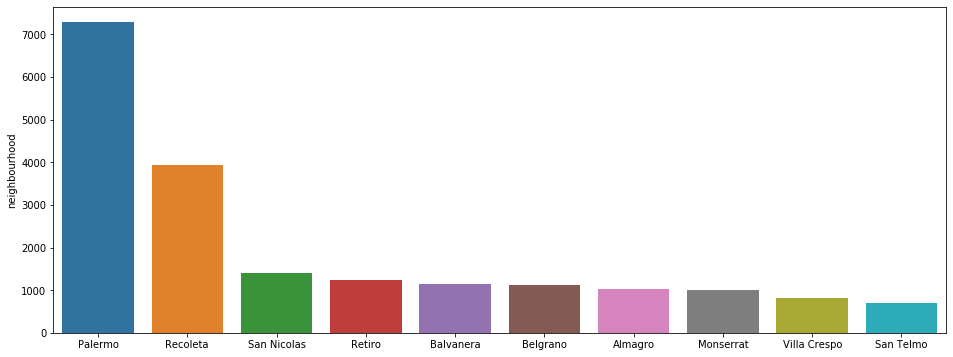

In [15]:
plt.figure(figsize=(16, 6))
sns.barplot(x=df.neighbourhood.value_counts().head(10).index, y=df.neighbourhood.value_counts().head(10))

Claramente los tres barrios con más anuncios son Palermo, Recoleta y San Nicolas.

#### Tipo de habitación

Veamos que tipo de habitación es la que más anuncios tiene.

In [16]:
# En cantidades
df.room_type.value_counts()

Entire home/apt    18493
Private room        4741
Shared room          556
Hotel room           293
Name: room_type, dtype: int64

##### En un gráfico:

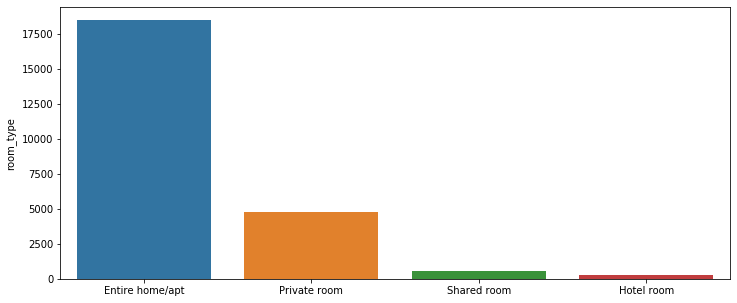

In [18]:
sns.barplot(x=df.room_type.value_counts().index, y=df.room_type.value_counts())

El tipo de propiedad que más anuncios tiene son las casas/departamentos, con un 57% de diferencia ante las habitaciones privadas.

#### Precios

Veamos cuales son los datos estadisticos de los precios y cual es su distribución, ¿podemos sacar alguna conclusión?

In [19]:
df.price.describe()

count     24083.000000
mean       3195.517502
std       11693.018875
min         120.000000
25%        1260.000000
50%        1981.000000
75%        3001.000000
max      600155.000000
Name: price, dtype: float64

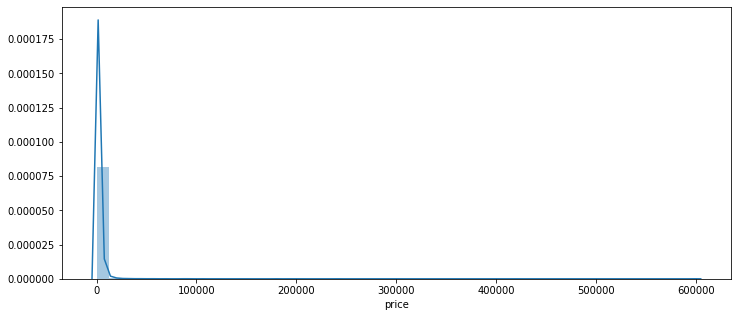

In [20]:
sns.distplot(df.price)

Se observa que existe una dispersión muy importante, debido a que el valor maximo es 600.155 y el mínimo 120.

Por esta razón procederemos a analizar los valores Outliers.

#### Outliers

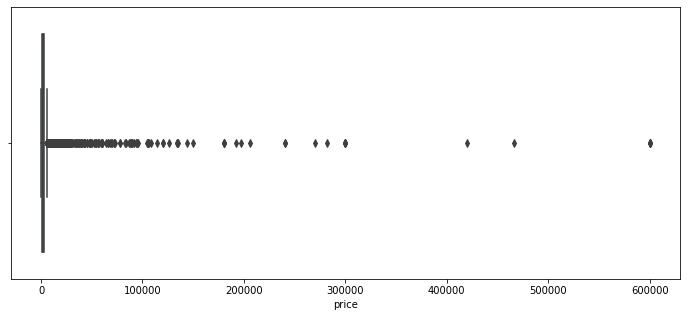

In [21]:
sns.boxplot(df.price)

Con la formula de Rango Intercuartíl procedemos a eleminar los valores outliers:

In [22]:
q1 = df.price.quantile(0.25)
q3 = df.price.quantile(0.75)

iqr = q3 - q1

min = q1 - (iqr*1.5)
max = q3 + (iqr*1.5)

#df_filtered = df[(df.price_usd_per_m2 >= q1) & (df.price_usd_per_m2 <= q3)]
df_filtered = df[(df.price > min) & (df.price < max)]
df_filtered

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,¡¡Great Loft in Palermo Hollywood!!,18822,Toni,Palermo,-34.582410,-58.433820,Entire home/apt,2041,20,14,2018-04-30,0.15,1,363
1,Amazing Luxurious Apt-Palermo Soho,42762,Candela,Palermo,-34.582250,-58.424600,Entire home/apt,3601,2,26,2019-11-28,0.28,1,323
2,Room in Recoleta - awesome location,48799,Matt,Recoleta,-34.597610,-58.394680,Private room,1441,1,20,2017-12-11,0.17,1,365
3,Standard Room at Palermo Viejo B&B,50994,Ariel,Palermo,-34.593820,-58.429940,Private room,2701,1,1,2018-12-18,0.07,7,365
4,Standard Room in Palermo Viejo B&B,50994,Ariel,Palermo,-34.593980,-58.428530,Private room,2701,1,0,NaN,NaN,7,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24078,Nazca 1400,330175600,Matafuegos,Villa Santa Rita,-34.616580,-58.476230,Entire home/apt,1441,2,0,NaN,NaN,1,360
24079,Modern apartment with pool in the heart of Pal...,128733042,Luisina,Recoleta,-34.595556,-58.412277,Entire home/apt,3001,4,0,NaN,NaN,2,48
24080,Greenzone - Habitación privada (hasta 3 personas),22286043,Martina,Caballito,-34.607010,-58.460170,Private room,600,4,0,NaN,NaN,1,148
24081,Full 2 guests flat at famous P SOHO PLAZA SERR...,1482817,Lorena,Palermo,-34.587789,-58.430529,Entire home/apt,1921,3,0,NaN,NaN,45,83


La cantidad de valores eliminados fue de:

In [23]:
len(df) - len(df_filtered)

2040

Veamos ahora, que cambio en los valores estadísticos:

In [24]:
df_filtered.price.describe()

count    22043.000000
mean      2072.462913
std       1148.663177
min        120.000000
25%       1200.000000
50%       1801.000000
75%       2701.000000
max       5582.000000
Name: price, dtype: float64

Claramente podemos observar que ya no existe tanta dispersión como en el data set original, esto se debe por haber aplicado la formula de Rango intercuartil
y haber eliminado los valores outliers. Anteriormente, existian valores aislados muy altos, que ahora fueron eliminados.

Ahora, el promedio y la mediana estan más cercanas y la desviación estandar es mucho más baja que antes (11.693 y ahora 1.148).

Veamos esto en un boxplot y en un gráfico de distribución:

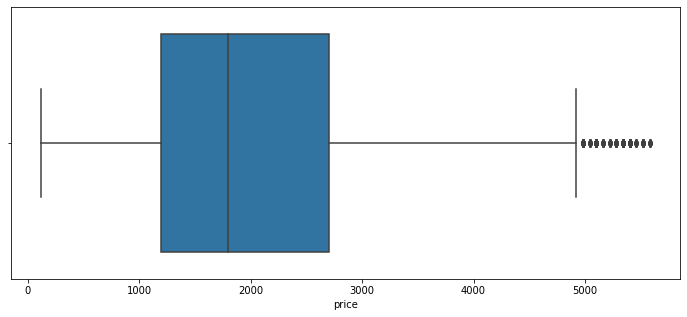

In [25]:
sns.boxplot(df_filtered.price)

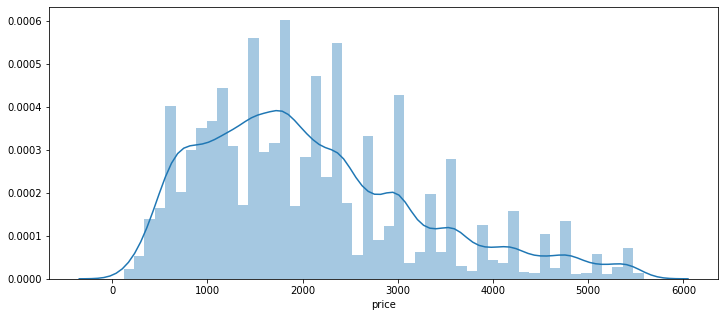

In [26]:
sns.distplot(df_filtered.price)

Ahora si, este gráfico se entiende mucho más que el anterior, claramente podemos decir que no sigue los lineamientos de una distribución normal.

Pareciera que es una distribución sesgada a la derecha (Sesgo positivo), donde la mediana < promedio.

Luego de haber filtrado, nos quedaremos con que:
* Precio máximo de los anuncios es de $5582.

* Precio mínimo de los anuncios es de $120.

* La mediana es de $1801

#### Mínimo de noches

Pasaremos a analizar la cantidad miníma de noches que se exige en los anuncios.

Comenzaremos con los datos estadisticos y luego iremos haciendo otros calculos.

In [27]:
df.minimum_nights.describe()

count    24083.000000
mean         5.728605
std         24.635683
min          1.000000
25%          1.000000
50%          3.000000
75%          4.000000
max       1125.000000
Name: minimum_nights, dtype: float64

Se puede observar una gran dispersión por el valor alto en la desviación estandar.

Además, se puede ver que el mínimo de noches exigidas es 1 y que como máximo nos podemos quedar hasta 1125 en algunos tipos de habitaciones.
En promedio (aunque afectado por la dipersión) se puede decir que los anuncion rondan las 6 noches, y las 3 noches si tenemos en cuenta la mediana, para tener
mayor claridad en este tema, más adelante buscaremos los outliers.

Comenzaremos graficando un boxplot para ver los outliers.

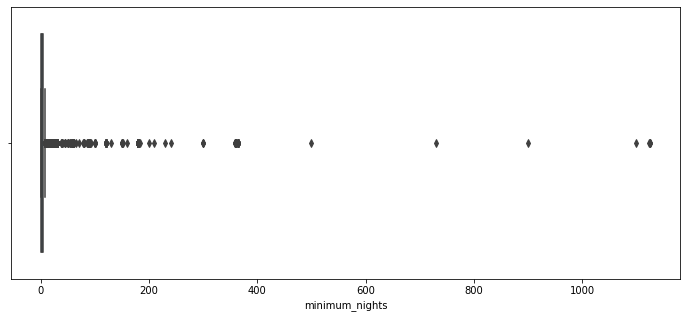

In [28]:
sns.boxplot(df.minimum_nights)

Volvemos a utilizar la formula del rango intercuartil para quitar los outliers y tener mayor claridad.

In [42]:
q1 = df.minimum_nights.quantile(0.25) 
q3 = df.minimum_nights.quantile(0.75)

iqr = q3 - q1

min = q1 - (1.5*iqr)
max = q3 + (1.5*iqr)

df_filtered_nights = df_filtered.copy()

df_filtered_nights = df_filtered_nights[ (df_filtered_nights.minimum_nights >= min) & (df_filtered_nights.minimum_nights <= max) ]
df_filtered_nights

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,Amazing Luxurious Apt-Palermo Soho,42762,Candela,Palermo,-34.582250,-58.424600,Entire home/apt,3601,2,26,2019-11-28,0.28,1,323
2,Room in Recoleta - awesome location,48799,Matt,Recoleta,-34.597610,-58.394680,Private room,1441,1,20,2017-12-11,0.17,1,365
3,Standard Room at Palermo Viejo B&B,50994,Ariel,Palermo,-34.593820,-58.429940,Private room,2701,1,1,2018-12-18,0.07,7,365
4,Standard Room in Palermo Viejo B&B,50994,Ariel,Palermo,-34.593980,-58.428530,Private room,2701,1,0,NaN,NaN,7,365
5,Standard Room at Palermo Viejo B&B,50994,Ariel,Palermo,-34.593810,-58.430070,Private room,2701,1,66,2019-11-27,2.08,7,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24078,Nazca 1400,330175600,Matafuegos,Villa Santa Rita,-34.616580,-58.476230,Entire home/apt,1441,2,0,NaN,NaN,1,360
24079,Modern apartment with pool in the heart of Pal...,128733042,Luisina,Recoleta,-34.595556,-58.412277,Entire home/apt,3001,4,0,NaN,NaN,2,48
24080,Greenzone - Habitación privada (hasta 3 personas),22286043,Martina,Caballito,-34.607010,-58.460170,Private room,600,4,0,NaN,NaN,1,148
24081,Full 2 guests flat at famous P SOHO PLAZA SERR...,1482817,Lorena,Palermo,-34.587789,-58.430529,Entire home/apt,1921,3,0,NaN,NaN,45,83


En total se eliminaron:

In [43]:
len(df) - len(df_filtered_nights)

3765

Veamos los nuevos valores estadisticos, el boxplot y su distribución:

In [31]:
df_filtered_nights.minimum_nights.describe()

count    22198.000000
mean         2.740292
std          1.733465
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: minimum_nights, dtype: float64

Claramente la desviación estandar disminuyo en 10, y tiene más sentido, al igual que el promedio y la media ahora son muy similares.

Ahora tenemos un máximo de 8 noches y el mínimo sigue siendo de 1 noche.

Veamos el boxplot y los outliers luego del filtro:

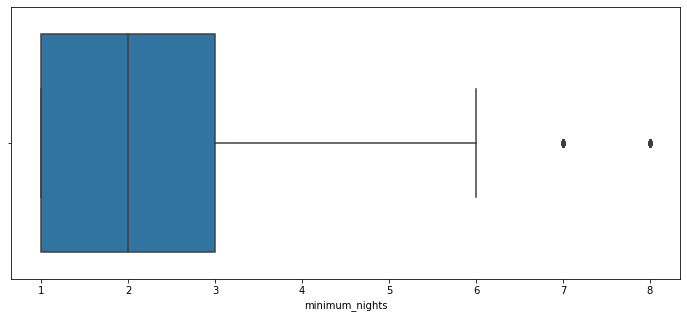

In [32]:
sns.boxplot(df_filtered_nights.minimum_nights)

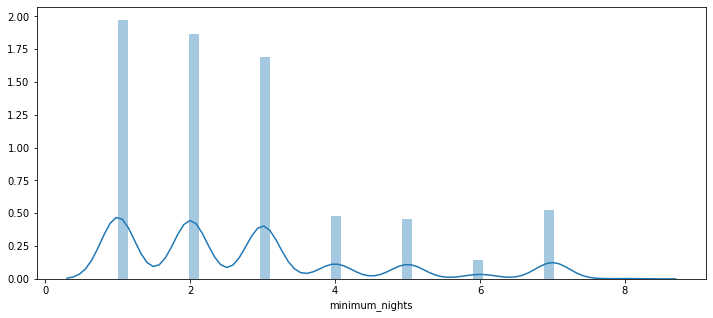

In [33]:
sns.distplot(df_filtered_nights.minimum_nights)

### Latitud y longitud en un mapa

In [34]:
df.groupby(["latitude","longitude"]).size().sort_values().tail(10)

latitude    longitude 
-34.598178  -58.388142    2
-34.600140  -58.440960    2
-34.585680  -58.424200    2
-34.589650  -58.390990    2
-34.604430  -58.395800    2
-34.595020  -58.386010    2
-34.589370  -58.411450    2
-34.581870  -58.406260    2
-34.619940  -58.372590    2
-34.579606  -58.411490    3
dtype: int64

### 4. Graficando y cruzando variables para entender mejor.


#### Tipos de habitaciones por barrios

Veamos como es la relación entre los tipos de habitaciones y los barrios, para esto comenzaremos por un scatter plot.

In [35]:
pd.crosstab(index=df.neighbourhood, columns=df.room_type, margins=True)

room_type,Entire home/apt,Hotel room,Private room,Shared room,All
neighbourhood,,,,,
Agronomia,18,0,21,1,40
Almagro,677,2,310,37,1026
Balvanera,690,17,395,37,1139
Barracas,108,0,69,5,182
Belgrano,855,3,239,20,1117
Boca,73,0,53,3,129
Boedo,58,0,51,5,114
Caballito,305,0,155,17,477
Chacarita,291,1,126,9,427


#### Tipos de habitaciones por barrios

In [56]:
sns.barplot(x = df.neighbourhood.value_counts().head(5).index, y="price", hue = "room_type",data = df, palette="Set1")
plt.title("Precio agrupado por barrios y tipo de habitacion")
plt.show()

ValueError: Grouper and axis must be same length

### 5. Correlaciones.

In [37]:
# HOST - Puedo sacar una nueva feature 
df.groupby(['host_id', 'host_name']).size().sort_values(ascending=False).head(10)

host_id    host_name         
7786587    Maximiliano           108
226049318  Maxim                  97
3469227    Federico               88
55553719   For Rent Argentina     88
15900304   Gabriel                69
2597734    Welcome2BA             60
1875949    Diego                  56
20907367   Marcela                55
15466789   Juan                   52
16133446   Luis & Florencia       51
dtype: int64

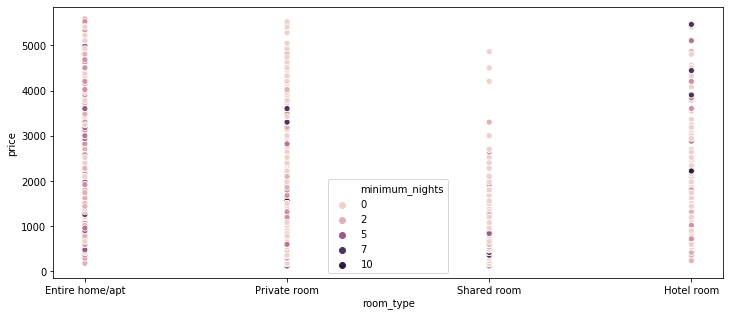